In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Metodos de evaluacion

Por ahora hemos visto que :
    Se necesita separar de forma aleatoria en datos de entrenamiento y testeo para poder evaluar performance del algoritmo
    Existen diversas metricas para evaluar rendimiento y elegimos la nuestra segun las caracteristicas de nuestro problema
    Es util apoyar la evaluacion con visualizaciones de errores, como por ejemplo scatterplots de residuales.
Sin embargo nuestro metodo hasta ahora tiene falla. Este depende de la forma en que fueron elegidos nuestros datos de forma aleatoria:
    Podemos tener suerte y caer en train set y test set que sea ideal para nuestro modelo.
    Podemos tener pesima performance con esa separacion de datos pero no en otros.
    

Controlar la aleatoriedada en train_test_split

In [4]:
X = pd.read_csv('/home/algoritmia/Dropbox/ml_intro/vol/intermediate_results/intermediate_results/X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [20]:
len(X)

2221

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X,y, random_state=1)

In [10]:
X2_train, X2_test,  y2_train, y2_test = train_test_split(X,y, random_state=1)

In [11]:
pd.DataFrame.equals(X_train,X2_train)

True

In [7]:
X_train.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
971,40000000.0,1998.0,2.35,108.0,8610.0,4.000000e+07,6.1,14047592.0,2539.0
1078,37000000.0,2008.0,1.85,96.0,36093.0,3.700000e+07,7.0,19128001.0,2651.0
1699,20000000.0,2008.0,2.35,115.0,10507.0,5.329615e+07,6.8,248847.0,14.0
570,61000000.0,2013.0,2.35,109.0,20148.0,6.100000e+07,6.7,27059130.0,3025.0
343,85000000.0,1998.0,1.85,178.0,23950.0,9.000000e+07,7.1,15017995.0,2503.0


In [12]:
X2_train.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
1724,20000000.0,2004.0,1.85,99.0,1189.0,40000000.0,4.8,6160886.0,2445.0
2027,14000000.0,1998.0,2.35,99.0,3500.0,14000000.0,5.5,10515444.0,2257.0
1843,18000000.0,2008.0,2.35,98.0,2215.0,18000000.0,5.1,300000.0,482.0
470,72000000.0,2001.0,2.35,116.0,14780.0,72000000.0,4.5,12174504.0,2905.0
1225,31000000.0,2012.0,2.35,138.0,20952.0,31000000.0,7.3,24900566.0,1884.0


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

scores = cross_val_score(Lasso(),X,y,cv=5,scoring='r2')
scores

array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

In [14]:
scores.mean()

0.4496402174579182

In [16]:
Lasso().fit(X_train,y_train).score(X_test,y_test)

0.7926190294963362

# Overfitting o Underfitting

Recuerde que para saber si estamos en overfitting o en underfittin necesitamos los scores de entrenamiento

In [21]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /home/algoritmia/anaconda3/lib/python3.6/site-packages (0.20.0)
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
from sklearn.model_selection import cross_validate
results = cross_validate(Lasso(),X,y,return_train_score=True,cv=5)
results

{'fit_time': array([0.01208949, 0.08523083, 0.04319882, 0.03189564, 0.02254868]),
 'score_time': array([0.00857377, 0.00948811, 0.00675011, 0.00050688, 0.00053334]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [23]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.7491178363039035
0.4496402174579182


Tenemos baias por que buscaremos modelos mas complejos

# Validation Curves y Learning Curves

In [25]:
from sklearn.neighbors import KNeighborsRegressor
cross_validate(KNeighborsRegressor(),X,y,cv=5)

{'fit_time': array([0.00916147, 0.00257921, 0.00210547, 0.00645161, 0.00240779]),
 'score_time': array([0.01210237, 0.0171771 , 0.01638031, 0.01232433, 0.00425267]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077]),
 'train_score': array([0.73553883, 0.78647652, 0.78386739, 0.77876542, 0.77477287])}

In [26]:
cross_validate(KNeighborsRegressor(n_neighbors=10),X,y,cv=5)

{'fit_time': array([0.00834107, 0.00797677, 0.02349043, 0.00355077, 0.00216818]),
 'score_time': array([0.01306987, 0.01214218, 0.01233101, 0.01400352, 0.01766229]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ]),
 'train_score': array([0.67830521, 0.76365722, 0.76231726, 0.75701303, 0.75061953])}

In [36]:
n = np.arange(2,50,2)
n.shape

(24,)

In [37]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(),X,y,param_name='n_neighbors',param_range=n,cv=5)

In [39]:
np.mean(train_scores,axis=1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

In [40]:
n.shape


(24,)

([<matplotlib.axis.XTick at 0x7fafaf69c780>,
 <a list of 24 Text xticklabel objects>)

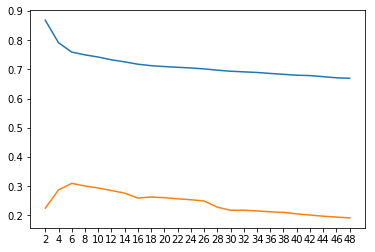

In [42]:
plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
plt.xticks(np.arange(24),n)

In [43]:
Lasso()

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
from sklearn.model_selection import learning_curve
lc = learning_curve(KNeighborsRegressor(n_neighbors=6),X,y,cv=5)
samples,train,test = lc[0],lc[1],lc[2]

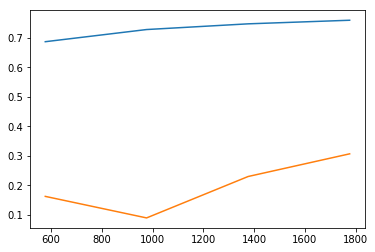

In [50]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])